Importing necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


/home/nitesh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Reading the training and testing csv file from kaggle.com (Titanic- Machine Learning From Disaster)

In [2]:
df_train = pd.read_csv("/home/nitesh/Downloads/titanic_dataset/train.csv")
df_test = pd.read_csv("/home/nitesh/Downloads/titanic_dataset/test.csv")

Displaying first five features of training set

In [3]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above code provides the descriptive statistics regarding our dataset. Using this describe() pandas function,
we can check the statistics. For instance, we can say that the maximum fare somebody provided to be in Titanic is
512 while the min is only 0.0. Similarly, we can give various insight using describe() function

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, using isnull() function, we can see that the Age and Cabin feature got null values.
We can observe that the Cabin properties has got around 80% null values, we can may drop this feature.

In [6]:
df_train.duplicated().sum()

0

This above code shows that we don't have any duplicate values

<Axes: >

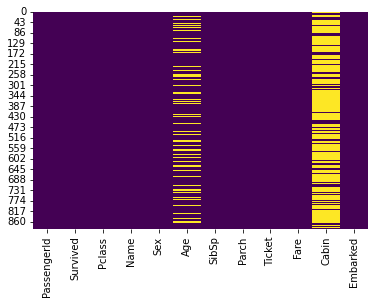

In [7]:
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis')


In [8]:
df_train.info()

### Here we can see the data column with various data-types, memory usage, and total number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis

# Performing univariate analysis on Age column

In [9]:
df_train['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
df_train["Age"].isna().sum()


177

Here, we conclude that the age feature contain 177 null values in it. Let's dive more into the age feature and 
check how we can fill the feature null values.

In [11]:
# let's perform univariate analysis with numerical feature first. PassengerId does not play a signicant role,
# so, we only perform on Age and Fare

df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

This conclude that the average age of a person traveling in titanic is almost 30 year old. 
The youngest one is only 4 month old and the oldest person traveling in the titanic is 80 year old.

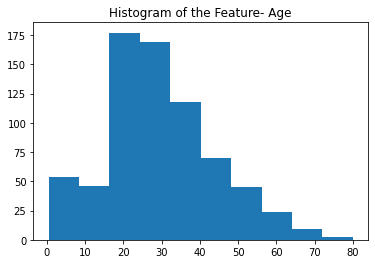

In [12]:
plt.hist(df_train['Age'])
plt.title('Histogram of the Feature- Age')
plt.show()

<Axes: >

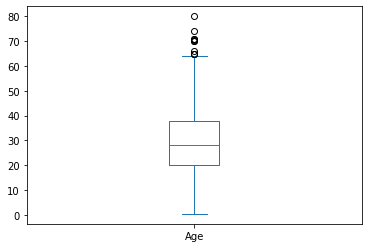

In [13]:
# Boxplot helps to show the outlier in the data
df_train['Age'].plot(kind='box')

As per our boxplot the age above maybe 65 are outlier,
let's dive more into the data whether they are the real values or the outliers.

In [14]:
df_train[df_train['Age'] > 65]
# Here, the data shows that the age is relevent and we can conclude the age upto 80 years are traveling in titanic.
# We can further conclude the survival score as per the age bivariate analysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


# Let's do univariate analysis on Fare column now


In [15]:
df_train["Fare"].isna().sum()

0

This indicate that we don't have any null values

In [16]:
df_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

This shows the descriptive stats

<Axes: ylabel='Frequency'>

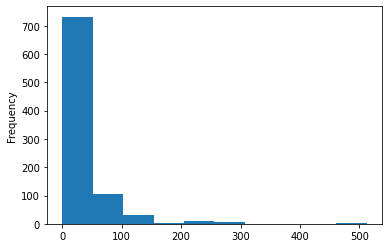

In [17]:
df_train["Fare"].plot(kind='hist')

<Axes: ylabel='Density'>

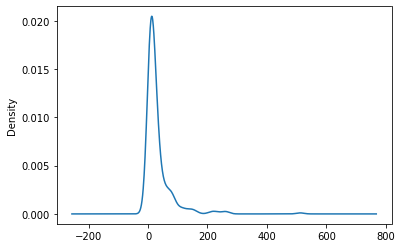

In [18]:
df_train["Fare"].plot(kind="kde")

In [19]:
df_train["Fare"].skew()

4.787316519674893

This shows that Fare is positively skewed, which means it doesnot have normal distribution

<Axes: >

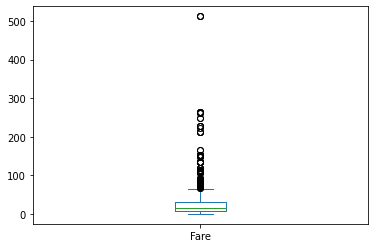

In [20]:
df_train["Fare"].plot(kind="box")

In [21]:
# let's check the fare above 250 to check whether this is outlier or the real max values

df_train[df_train["Fare"] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


After studying the rows, we can see that the same ticket is on various column with same fare, 
which means that whole family is taking the ticket. Maybe the family members would be only one or more than one.

# Let's do univariate analysis on Survived categorical column 

In [22]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

This shows that 549 people were died and 342 people will survived during the titanic incident.

In [23]:
df_train["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<Axes: xlabel='Survived'>

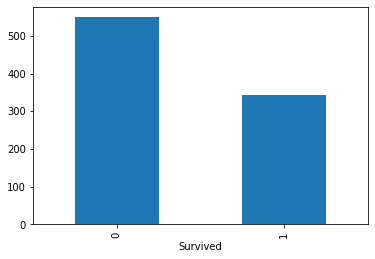

In [24]:
df_train["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

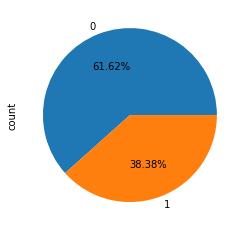

In [25]:
df_train["Survived"].value_counts().plot(kind="pie", autopct="%0.2f%%")

This shows that around 62% of people were died and around 38% percent individuals were survived.

# Let's again perform univariate analysis on Pclass categorical column

In [26]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [27]:
df_train["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<Axes: xlabel='Pclass'>

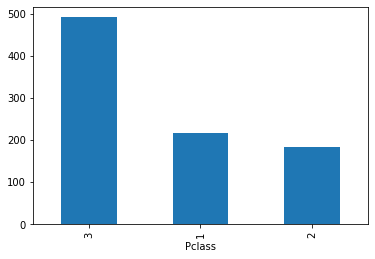

In [28]:
df_train["Pclass"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

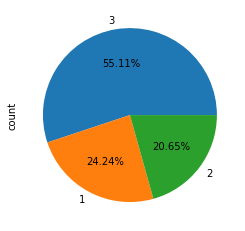

In [29]:
df_train["Pclass"].value_counts().plot(kind="pie", autopct='%0.2f%%')

# Performing univariate analysis on sex categorical column

In [30]:
df_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
df_train["Sex"].isna().any()

False

<Axes: xlabel='Sex'>

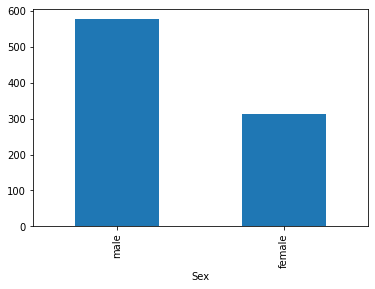

In [32]:
df_train["Sex"].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

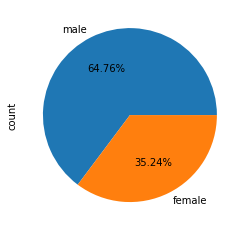

In [33]:
df_train["Sex"].value_counts().plot(kind='pie', autopct="%0.2f%%")

In [34]:
df_train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Performing univariate analysis in SibSp column

In [35]:
df_train["SibSp"].isnull().sum()

0

In [36]:
df_train["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

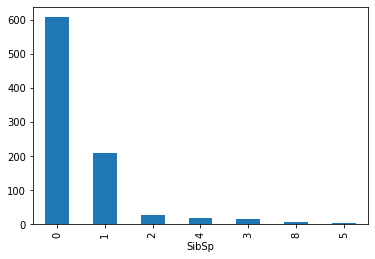

In [37]:
df_train["SibSp"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

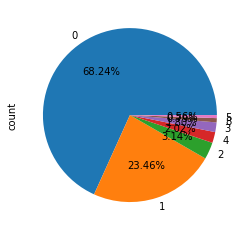

In [38]:
df_train["SibSp"].value_counts().plot(kind="pie", autopct="%0.2f%%")

# Performing univariate analysis in Parch column

In [39]:
df_train["Parch"].isna().any()

False

In [40]:
df_train["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

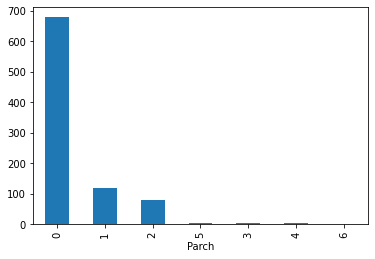

In [41]:
df_train["Parch"].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

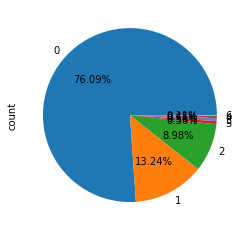

In [42]:
df_train["Parch"].value_counts().plot(kind='pie', autopct="%0.2f%%")

# Performing univariate analysis in Embarked categorical column

In [43]:
df_train["Embarked"].isna().sum()

2

This column contain 2 missing values. We will handle this missing values after performing univariate and multivariate analysis

In [44]:
df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

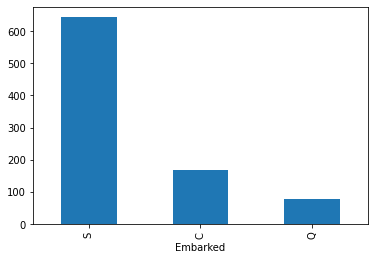

In [45]:
df_train["Embarked"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

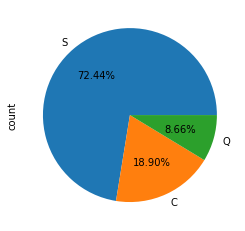

In [46]:
df_train["Embarked"].value_counts().plot(kind='pie', autopct="%0.2f%%")

# Let's perform bivariate analysis

In [47]:
df_train[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


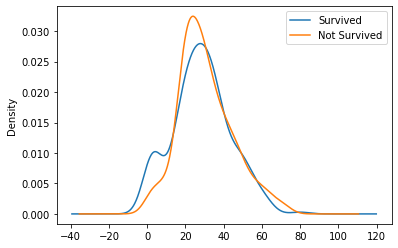

In [48]:
# lets perform the analysis with survived column and Age
df_train[df_train["Survived"] == 1]['Age'].plot(kind='kde', label="Survived")
df_train[df_train["Survived"] == 0]['Age'].plot(kind='kde', label="Not Survived")
plt.legend()
plt.show()

This kde plot shows that the age plays a significant role in survival.The individuals below aged around 20 is given higher priority as the graph shows that the survival rate is very high.

In [49]:
df_train["Fare"].max()

512.3292

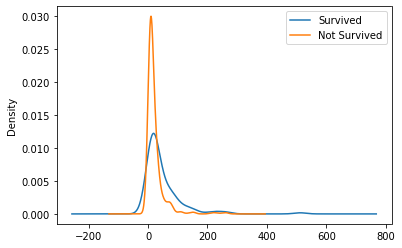

In [50]:
# let's also perform this analysis with Fare column

df_train[df_train["Survived"]==1]["Fare"].plot(kind='kde', label="Survived")
df_train[df_train["Survived"]==0]["Fare"].plot(kind='kde', label="Not Survived")
plt.legend()
plt.show()


In [51]:
df_train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [52]:
df_train[df_train["Ticket"] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


This code gives us valuable information. Here we can observe that the Ticket CA. 2343 has all the same fare.
In addition to that, this ticket also has same number of SibSp and Parch and they all enter into Titanic from same 
place i.e., Embarked=S.

After observing these rows, we can predict that the Fare is the total fare of the family members.

Now, we can perform feature engineering by establishing a new feature which contain individual fare of the passenger.
We can also concatenate both SibSp and Parch as they are all family members. This step is called the feature engineering.

In [53]:
pd.crosstab(df_train['Survived'], df_train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [54]:
pd.crosstab(df_train['Survived'], df_train['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


This shows that 25% of female were dead and 74% of female survived, while 81% of male died and 18% survived. 
We conclude that the survival rate of female is way too high compared to the survival rate of males.



In [55]:
pd.crosstab(df_train['Survived'], df_train['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


It seems weird, but the survival rate defers with the port of Embarkation as per the crosstab calculation above.

In [56]:


cross_tab = pd.crosstab(df_train['Survived'], df_train['Pclass'], normalize='columns') * 100
print(cross_tab)


Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


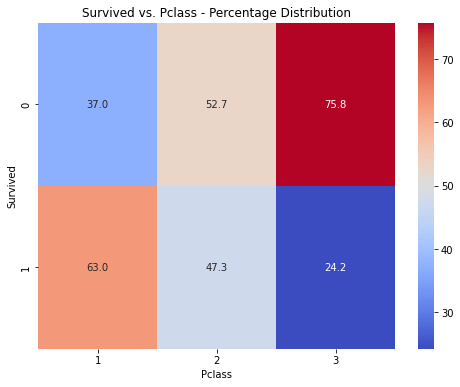

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Survived vs. Pclass - Percentage Distribution')
plt.show()


This shows that the survival rate depends on which class passenger they are.

# Multivariate Analysis

In [58]:
cross_tab = pd.crosstab([df_train['SibSp'], df_train['Parch']], df_train['Survived'], normalize='columns') * 100
cross_tab

Survived             0          1
SibSp Parch                      
0     0      68.123862  47.660819
      1       2.367942   7.309942
      2       1.457195   6.140351
      3       0.000000   0.292398
      4       0.182149   0.000000
      5       0.364299   0.000000
1     0      10.746812  18.713450
      1       4.189435   9.941520
      2       1.275046   3.508772
      3       0.364299   0.292398
      4       0.546448   0.000000
      5       0.364299   0.292398
      6       0.182149   0.000000
2     0       2.185792   1.169591
      1       0.182149   1.754386
      2       0.364299   0.584795
      3       0.000000   0.292398
3     0       0.000000   0.584795
      1       1.275046   0.000000
      2       0.910747   0.584795
4     1       1.639344   0.000000
      2       1.092896   0.877193
5     2       0.910747   0.000000
8     2       1.275046   0.000000

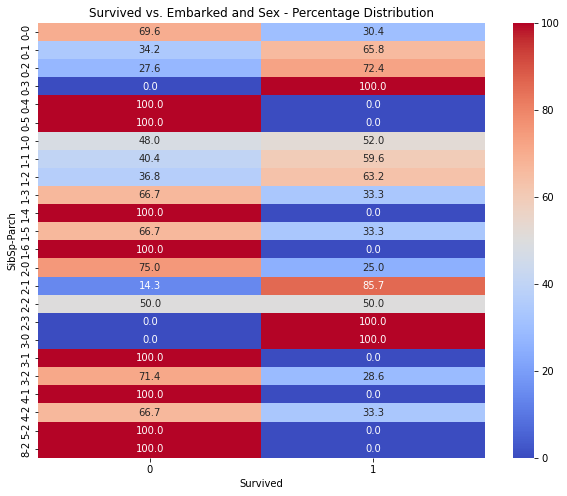

In [59]:
cross_tab = pd.crosstab([df_train['SibSp'], df_train['Parch']], df_train['Survived'], normalize='index') * 100
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Survived vs. Embarked and Sex - Percentage Distribution')
plt.show()

In [60]:
cross_tab = pd.crosstab([df_train['Embarked'], df_train['Sex']], df_train['Survived'], normalize='columns') * 100
cross_tab

Survived                 0          1
Embarked Sex                         
C        female   1.639344  18.823529
         male    12.021858   8.529412
Q        female   1.639344   7.941176
         male     6.921676   0.882353
S        female  11.475410  41.176471
         male    66.302368  22.647059

Here, after performing multivariate analysis in three important features, we conclude that there is high survival percentage of female in titanic compared to male passengers.

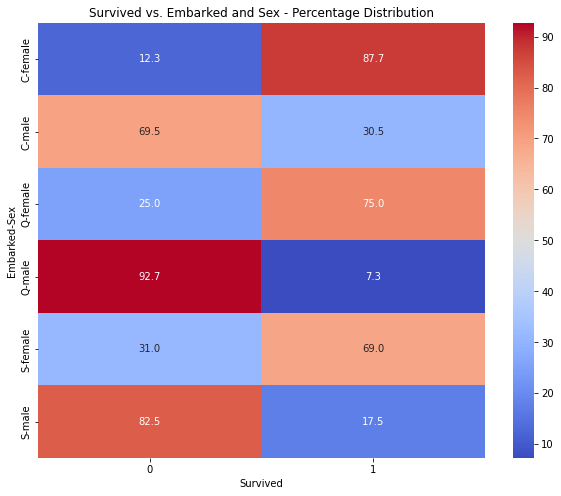

In [61]:
cross_tab = pd.crosstab([df_train['Embarked'], df_train['Sex']], df_train['Survived'], normalize='index') * 100
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Survived vs. Embarked and Sex - Percentage Distribution')
plt.show()

This is the visualization of the multivariate analysis we just performed above where we found that the survival rate is higher in female compared to male, whether they are from any port of embarkation.

# Feature Engineering

As we observe that the SibSp and Parch features are interrelated with each other, so we can combine and make a single feature for both features.

In [62]:
df_train['family_size'] = df_train['SibSp'] + df_train['Parch'] +1


In [63]:
df_train['family_size'][:5]

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64

In [64]:
# let's categorize the family size 

def family_size_func(num):
    if num == 1:
        return 'Alone'
    elif num > 1 and num <=4:
        return 'Small'
    else:
        return 'large'

In [65]:
df_train['family_status'] = df_train['family_size'].apply(family_size_func)

In [66]:
df_train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,large
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Small
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Small


As we can see that the fare here is the total fare of family, so we can evaluate the individual fare from the existing features

In [67]:
df_train['Individual_Fare'] = df_train['Fare'] / df_train['family_size']

In [68]:
df_train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_status,Individual_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,8.05000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Alone,8.45830
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Alone,51.86250
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,large,4.21500
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Small,3.71110
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Small,15.03540


In [69]:
# Now, let's drop the column Fare, SibSp and Parch from the dataframe

df_train.drop(columns=['Fare', 'SibSp', 'Parch'], inplace=True, axis='columns')

In [70]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,family_size,family_status,Individual_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,NaN,S,2,Small,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C85,C,2,Small,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,NaN,S,1,Alone,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,C123,S,2,Small,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,NaN,S,1,Alone,8.05000


Now, lets work with the missing values, categorical and label encoding and dropping Name and Cabin column for now.

# Droping the Name and Cabin features

In [71]:
df_train.drop(columns=['Name', 'Cabin'], inplace=True, axis='columns')

In [72]:
df_train[:10]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Embarked,family_size,family_status,Individual_Fare
0,1,0,3,male,22.0,A/5 21171,S,2,Small,3.62500
1,2,1,1,female,38.0,PC 17599,C,2,Small,35.64165
2,3,1,3,female,26.0,STON/O2. 3101282,S,1,Alone,7.92500
3,4,1,1,female,35.0,113803,S,2,Small,26.55000
4,5,0,3,male,35.0,373450,S,1,Alone,8.05000
5,6,0,3,male,NaN,330877,Q,1,Alone,8.45830
6,7,0,1,male,54.0,17463,S,1,Alone,51.86250
7,8,0,3,male,2.0,349909,S,5,large,4.21500
8,9,1,3,female,27.0,347742,S,3,Small,3.71110
9,10,1,2,female,14.0,237736,C,2,Small,15.03540


In [73]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [74]:
df_train.drop(columns=['Ticket'], inplace=True, axis='columns')

In [75]:
df_train[:5]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family_size,family_status,Individual_Fare
0,1,0,3,male,22.0,S,2,Small,3.62500
1,2,1,1,female,38.0,C,2,Small,35.64165
2,3,1,3,female,26.0,S,1,Alone,7.92500
3,4,1,1,female,35.0,S,2,Small,26.55000
4,5,0,3,male,35.0,S,1,Alone,8.05000


# Now, let's deal with the missing values 

In [76]:
df_train.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                177
Embarked             2
family_size          0
family_status        0
Individual_Fare      0
dtype: int64

In [77]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [78]:
df_train[:2]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family_size,family_status,Individual_Fare
0,1,0,3,male,22.0,S,2,Small,3.62500
1,2,1,1,female,38.0,C,2,Small,35.64165


In [79]:
df_train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
Embarked           2
family_size        0
family_status      0
Individual_Fare    0
dtype: int64

In [80]:
# Now, lets deal with Embarked feature.
frequent_category = df_train['Embarked'].mode()[0]

df_train.fillna(frequent_category, inplace=True)

In [81]:
df_train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
Embarked           0
family_size        0
family_status      0
Individual_Fare    0
dtype: int64

# Let's deal with the datatype

In [82]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   Embarked         891 non-null    object 
 6   family_size      891 non-null    int64  
 7   family_status    891 non-null    object 
 8   Individual_Fare  891 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [83]:
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Age'] = df_train['Age'].astype('int64')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['family_status'] = df_train['family_status'].astype('category')


In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    category
 3   Sex              891 non-null    category
 4   Age              891 non-null    int64   
 5   Embarked         891 non-null    category
 6   family_size      891 non-null    int64   
 7   family_status    891 non-null    category
 8   Individual_Fare  891 non-null    float64 
dtypes: category(4), float64(1), int64(4)
memory usage: 38.9 KB


# Handling the categorical features

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
cat_encoder = OneHotEncoder()

# Reshape the data to a 2D array
sex_reshaped = df_train['Sex'].values.reshape(-1, 1)

# Fit and transform the data using the OneHotEncoder
sex_encoded_1hot = cat_encoder.fit_transform(sex_reshaped)

# The result is a sparse matrix, let's convert it to a dense array
sex_encoded_1hot_array = sex_encoded_1hot.toarray()

# Add the encoded columns to the DataFrame
df_train[['Sex_encoded_1hot_0', 'Sex_encoded_1hot_1']] = sex_encoded_1hot_array



In [87]:
df_train[:5]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family_size,family_status,Individual_Fare,Sex_encoded_1hot_0,Sex_encoded_1hot_1
0,1,0,3,male,22,S,2,Small,3.62500,0.0,1.0
1,2,1,1,female,38,C,2,Small,35.64165,1.0,0.0
2,3,1,3,female,26,S,1,Alone,7.92500,1.0,0.0
3,4,1,1,female,35,S,2,Small,26.55000,1.0,0.0
4,5,0,3,male,35,S,1,Alone,8.05000,0.0,1.0


In [88]:
df_train.drop('Sex', inplace=True, axis='columns')

In [89]:
df_train[:5]

,PassengerId,Survived,Pclass,Age,Embarked,family_size,family_status,Individual_Fare,Sex_encoded_1hot_0,Sex_encoded_1hot_1
0,1,0,3,22,S,2,Small,3.62500,0.0,1.0
1,2,1,1,38,C,2,Small,35.64165,1.0,0.0
2,3,1,3,26,S,1,Alone,7.92500,1.0,0.0
3,4,1,1,35,S,2,Small,26.55000,1.0,0.0
4,5,0,3,35,S,1,Alone,8.05000,0.0,1.0


# We can use either above or below code, both works. 
# But let's practice using the below code so it will be easier if we have many categorical values in column feature.

<!-- We can use ethier below code or the above code, both works. But we re-write again and use below code for future when we have many values in our features -->

In [90]:
# Create an instance of OneHotEncoder
cat_encoded = OneHotEncoder()

# Reshape the 'family_size' column to a 2D array
cat_encoded_reshaped = df_train['Embarked'].values.reshape(-1, 1)

# Fit and transform the reshaped data using OneHotEncoder
cat_encoded_1hot = cat_encoded.fit_transform(cat_encoded_reshaped)

# Convert the result to a dense NumPy array
cat_encoded_1hot_toarray = cat_encoded_1hot.toarray()

# Create a DataFrame with the one-hot encoded values
encoded_df = pd.DataFrame(cat_encoded_1hot_toarray, columns=cat_encoded.get_feature_names_out(['Embarked']))

# Concatenate the encoded DataFrame with the original DataFrame
df_train_encoded = pd.concat([df_train, encoded_df], axis=1)

# Drop the original 'family_size' column 
df_train_encoded.drop(['Embarked'], axis=1, inplace=True)

# # Display the encoded DataFrame
# print(df_train_encoded)


In [91]:
df_train_encoded[:5]

,PassengerId,Survived,Pclass,Age,family_size,family_status,Individual_Fare,Sex_encoded_1hot_0,Sex_encoded_1hot_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,2,Small,3.62500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38,2,Small,35.64165,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26,1,Alone,7.92500,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35,2,Small,26.55000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35,1,Alone,8.05000,0.0,1.0,0.0,0.0,1.0


In [92]:
# Create an instance of OneHotEncoder
cat_encoded = OneHotEncoder()

# Reshape the 'family_size' column to a 2D array
cat_encoded_reshaped = df_train['family_status'].values.reshape(-1, 1)

# Fit and transform the reshaped data using OneHotEncoder
cat_encoded_1hot = cat_encoded.fit_transform(cat_encoded_reshaped)

# Convert the result to a dense NumPy array
cat_encoded_1hot_toarray = cat_encoded_1hot.toarray()

# Create a DataFrame with the one-hot encoded values
encoded_df = pd.DataFrame(cat_encoded_1hot_toarray, columns=cat_encoded.get_feature_names_out(['family_status']))

# Concatenate the encoded DataFrame with the original DataFrame
df_train_encoded = pd.concat([df_train, encoded_df], axis=1)

# Drop the original 'family_size' column 
df_train_encoded.drop(['family_status'], axis=1, inplace=True)

# # Display the encoded DataFrame
# print(df_train_encoded)


In [93]:
df_train_encoded[:10]

,PassengerId,Survived,Pclass,Age,Embarked,family_size,Individual_Fare,Sex_encoded_1hot_0,Sex_encoded_1hot_1,family_status_Alone,family_status_Small,family_status_large
0,1,0,3,22,S,2,3.62500,0.0,1.0,0.0,1.0,0.0
1,2,1,1,38,C,2,35.64165,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26,S,1,7.92500,1.0,0.0,1.0,0.0,0.0
3,4,1,1,35,S,2,26.55000,1.0,0.0,0.0,1.0,0.0
4,5,0,3,35,S,1,8.05000,0.0,1.0,1.0,0.0,0.0
5,6,0,3,29,Q,1,8.45830,0.0,1.0,1.0,0.0,0.0
6,7,0,1,54,S,1,51.86250,0.0,1.0,1.0,0.0,0.0
7,8,0,3,2,S,5,4.21500,0.0,1.0,0.0,0.0,1.0
8,9,1,3,27,S,3,3.71110,1.0,0.0,0.0,1.0,0.0
9,10,1,2,14,C,2,15.03540,1.0,0.0,0.0,1.0,0.0


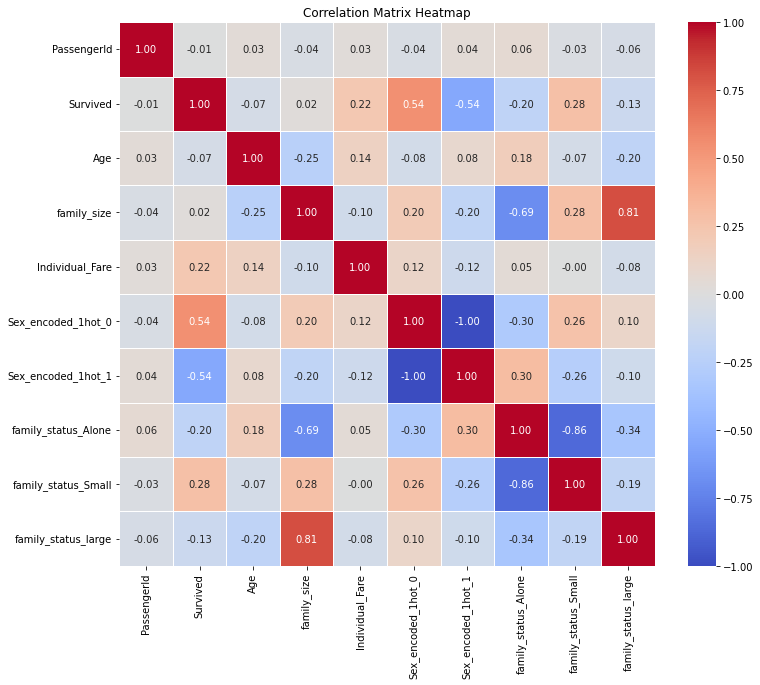

In [94]:
numeric_columns = df_train_encoded.select_dtypes(include=['number'])


plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()